In [ ]:
!python -m spacy download el_core_news_sm

     |████████████████████████████████| 11.4MB 7.2MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=69d02c4e4caf7b2f810260a6deb1377c42f8700ae3e752efc05911f7a0d745bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-09xoyeh0/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
# import the greek emotions lexicon

filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Remove duplicate words
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/xatzidakis_scrape.csv")

In [ ]:
len(df)

156

In [ ]:
df.head()

,tweets,likes,time,retweet_count
0,Δεν φτάνει που ο ΣΥΡΙΖΑ πάει κόντρα σε ένα νομ...,191,2021-07-09 10:47:25,31
1,Το είπαμε το κάναμε Εφαρμόζουμε αμέσως τον νόμ...,273,2021-07-08 15:00:51,46
2,Σήμερα στο ΝΑΤ σε ένα από τα πιο προβληματικά ...,367,2021-06-29 13:25:30,43
3,Δεν πρόκειται να μείνω θεατής στο μεγάλο πρόβλ...,435,2021-06-28 14:54:30,39
4,Ο ΣΥΡΙΖΑ προτιμά να μη δώσουμε 120 εκατ ευρώ τ...,268,2021-06-25 09:33:38,32


In [ ]:
df.dtypes

tweets           object
likes             int64
time             object
retweet_count     int64
dtype: object

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['tweets'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation(προσδοκία) words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
#Compute the sum of the emotions

df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
df.set_index('time' , inplace=True)

In [ ]:
df['tweets'].str.len().groupby(by=df.set.index.month).mean().plot() 

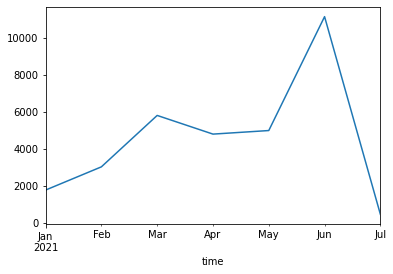

In [ ]:
df['tweets'].str.len().resample('M').sum().plot() 

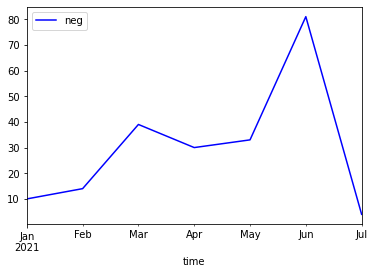

In [ ]:
df['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend() 

Text(0.5, 1.0, 'Συναισθήματα των tweets του Χατζηδάκη ανά μήνα')

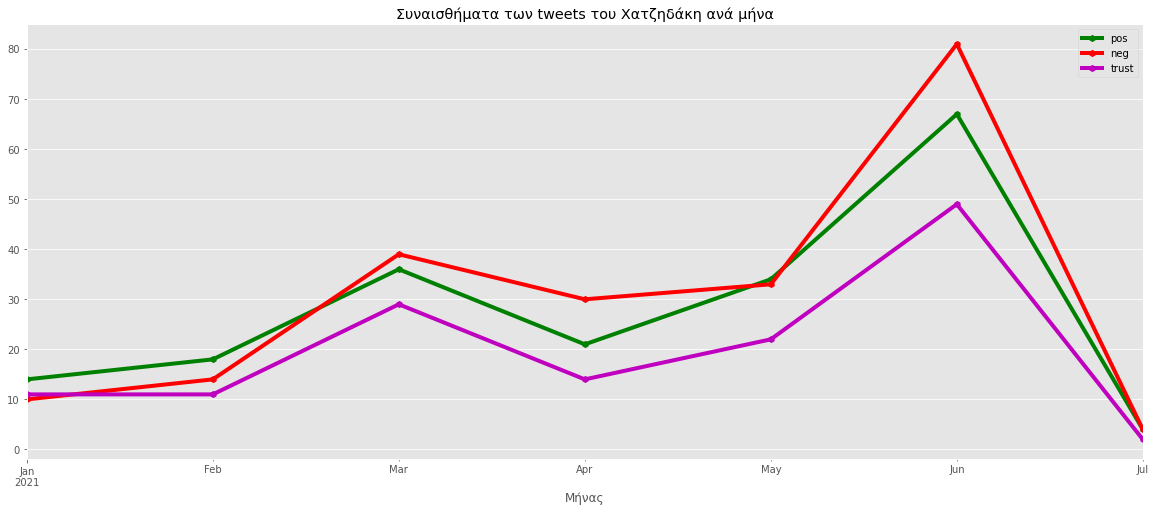

In [ ]:
# Create line chart of emotions using time series 

ax = df['positivity'].resample('M').sum().plot(marker= 'h',linestyle= 'solid',figsize=(16,4), color = 'green',label = ('pos'), lw= 4)
df['negative'].resample('M').sum().plot(marker= 'h',linestyle= 'solid',figsize=(20,4), ax = ax, color = 'red', label = ('neg'), lw= 4)
df['trust'].resample('M').sum().plot(marker= 'h',linestyle= 'solid',figsize=(20,8), ax = ax, color = 'm', label = ('trust'), lw= 4).legend()
plt.xlabel('Μήνας')
plt.title('Συναισθήματα των tweets του Χατζηδάκη ανά μήνα')




In [ ]:
df_new = df.resample('M').sum()

df_new

,likes,retweet_count,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
time,,,,,,,,,,,,
2021-01-31,1106,392,6,14,7,2,2,11,4,3,10,4
2021-02-28,2035,1180,4,18,5,3,3,11,10,6,14,7
2021-03-31,5425,931,16,36,18,9,8,29,16,14,39,20
2021-04-30,4839,683,15,21,7,7,5,14,17,10,30,8
2021-05-31,4323,1576,12,34,12,8,8,22,13,14,33,10
2021-06-30,9955,3802,40,67,13,20,10,49,24,20,81,19
2021-07-31,464,77,1,4,0,0,1,2,1,1,4,0


In [ ]:
df_new.to_csv('/content/gdrive/My Drive/Colab Notebooks/xatzidakis_per-month_sentiment.csv' )